# YOUR OFFICE PERFORMANCE ANALYSIS

“Your Office” is an online store based in USA, delivering in all 50 states.
It specializes in selling office related products which consists of furniture, technical gadgets and other office supplies. The management wants to analyze their performance of 2022 in comparison with 2021. They are trying to understand their delivery status, sales and profit margins in various regions and states. This will help them to make better decisions for the future.

In [164]:
import numpy as np #helps to work on arrays/maths
import pandas as pd #helps to work on dataframes
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns #visualizing data

# *Data Collection:*

•	Transaction data with order details (transaction_data.csv)

•	State and city information (state_city.csv)

•	Region Information (state_region.csv)


In [165]:
dfcty = pd.read_csv('state_city.csv',encoding = 'unicode escape') #read_csv helps to read the file
dfrg = pd.read_csv('state_region.csv',encoding = 'unicode escape')
dftsd = pd.read_csv('transaction_data.csv', encoding='unicode_escape', skiprows=[5789])
#unicode escape is used to avoid unicode error

In [166]:
# Display the first few rows of each DataFrame
print(dfcty.head())
print(dfrg.head())
print(dftsd.head())

# Check for basic info such as column names, data types, and missing values
print(dfcty.info())
print(dfrg.info())
print(dftsd.info())


  ï»¿customer_state customer_city
0          New York  New Rochelle
1             Texas       Houston
2          Kentucky    Louisville
3          Illinois       Chicago
4      Pennsylvania  Philadelphia
         name state   latitude   longitude customer_region
0      Alaska    AK  63.588753 -154.493062             NaN
1     Alabama    AL  32.318231  -86.902298           South
2    Arkansas    AR  35.201050  -91.831833           South
3     Arizona    AZ  34.048928 -111.093731            West
4  California    CA  36.778261 -119.417932            West
  customer_id customer_first_name customer_last_name product_category  \
0  C_ID_45866                Mary             Fuller  Office Supplies   
1  C_ID_44932                Alan            Edelman  Office Supplies   
2  C_ID_70880                Mary             Gayman  Office Supplies   
3  C_ID_33157             Raymond              Eason  Office Supplies   
4  C_ID_58303                Mary           Gonzalez        Furniture   

   

# *Data Cleaning and Integration:*

Cleaning the data by handling missing values, removing duplicates, and standardizing formats.

In [167]:
dfcty.rename(columns={'ï»¿customer_state': 'customer_state'}, inplace=True)


In [168]:
# Filling missing regions with a placeholder (or drop them if necessary)
dfrg['customer_region'].fillna('Unknown', inplace=True)

# Dropping rows with missing customer_city in the transaction data
dftsd.dropna(subset=['customer_city'], inplace=True)


C:\Users\newhp\AppData\Local\Temp\ipykernel_9440\1156629012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfrg['customer_region'].fillna('Unknown', inplace=True)


In [169]:
#Convert Date Columns to Datetime Format
#Convert the order_date and ship_date columns in the dftsd DataFrame to the correct datetime format:
#dftsd['order_date'] = pd.to_datetime(dftsd['order_date'], format='%d-%m-%Y')
#dftsd['ship_date'] = pd.to_datetime(dftsd['ship_date'], format='%d-%m-%Y')
dftsd['order_date'] = pd.to_datetime(dftsd['order_date'], format='%d/%m/%y')
dftsd['ship_date'] = pd.to_datetime(dftsd['ship_date'], format='%d/%m/%y')


Integrate the data from all sources into a unified dataset.

In [170]:
# Merge with state-city data
merged_df = pd.merge(dftsd, dfcty, left_on='customer_city', right_on='customer_city', how='left')

# Merge with state-region data
merged_df = pd.merge(merged_df, dfrg, left_on='customer_state', right_on='name', how='left')

# Drop unnecessary columns after merge
merged_df.drop(columns=['name'], inplace=True)


In [171]:
# Check the merged DataFrame
merged_df.head()

,customer_id,customer_first_name,customer_last_name,product_category,product_name,customer_segment,customer_city,order_date,order_id,ship_date,...,promised_days_for_shipment,order_item_discount,sales_per_order,order_quantity,profit_per_order,customer_state,state,latitude,longitude,customer_region
0,C_ID_45866,Mary,Fuller,Office Supplies,Xerox 1913,Corporate,New Rochelle,2022-05-11,O_ID_3001072,2022-05-12,...,2,35.0,500.0,5,223.199997,New York,NY,43.299428,-74.217933,East
1,C_ID_44932,Alan,Edelman,Office Supplies,#6 3/4 Gummed Flap White Envelopes,Corporate,Houston,2022-06-20,O_ID_3009170,2022-06-21,...,2,85.0,500.0,5,199.199997,Texas,TX,31.968599,-99.901813,Central
2,C_ID_70880,Mary,Gayman,Office Supplies,Belkin 8 Outlet Surge Protector,Consumer,Louisville,2022-06-25,O_ID_3047567,2022-06-30,...,4,75.0,44.0,5,195.500000,Kentucky,KY,37.839333,-84.270018,South
3,C_ID_70880,Mary,Gayman,Office Supplies,Belkin 8 Outlet Surge Protector,Consumer,Louisville,2022-06-25,O_ID_3047567,2022-06-30,...,4,75.0,44.0,5,195.500000,Colorado,CO,39.550051,-105.782067,West
4,C_ID_33157,Raymond,Eason,Office Supplies,GBC VeloBinder Manual Binding System,Corporate,Chicago,2022-06-10,O_ID_3060575,2022-06-12,...,2,60.0,254.0,1,220.000000,Illinois,IL,40.633125,-89.398528,Central


In [172]:
merged_df.describe()

,order_date,ship_date,promised_days_for_shipment,order_item_discount,sales_per_order,order_quantity,profit_per_order,latitude,longitude
count,151467,151467,151467.000000,151467.000000,151467.000000,151467.000000,151467.000000,151467.000000,151467.000000
mean,2021-12-11 08:39:07.283566592,2021-12-14 16:35:24.248846592,2.927971,21.013482,204.590562,1.973638,22.960045,38.510703,-93.519119
min,2021-01-04 00:00:00,2021-01-04 00:00:00,0.000000,0.000000,9.990000,1.000000,-3366.000000,27.664827,-120.740139
25%,2021-06-21 00:00:00,2021-06-25 00:00:00,2.000000,5.500000,119.980003,1.000000,7.200000,35.759573,-111.093731
50%,2021-12-06 00:00:00,2021-12-09 00:00:00,4.000000,14.400000,199.899994,1.000000,32.029999,38.802610,-86.580447
75%,2022-05-31 00:00:00,2022-06-03 00:00:00,4.000000,30.000000,299.950012,3.000000,65.570000,41.203322,-79.019300
max,2022-12-31 00:00:00,2023-01-06 00:00:00,4.000000,500.000000,11900.980000,500.000000,8800.830002,47.751074,-69.445469
std,NaN,NaN,1.379656,22.850404,153.391791,1.923798,108.349250,4.567185,16.962554


Detecting and Fixing Outliers

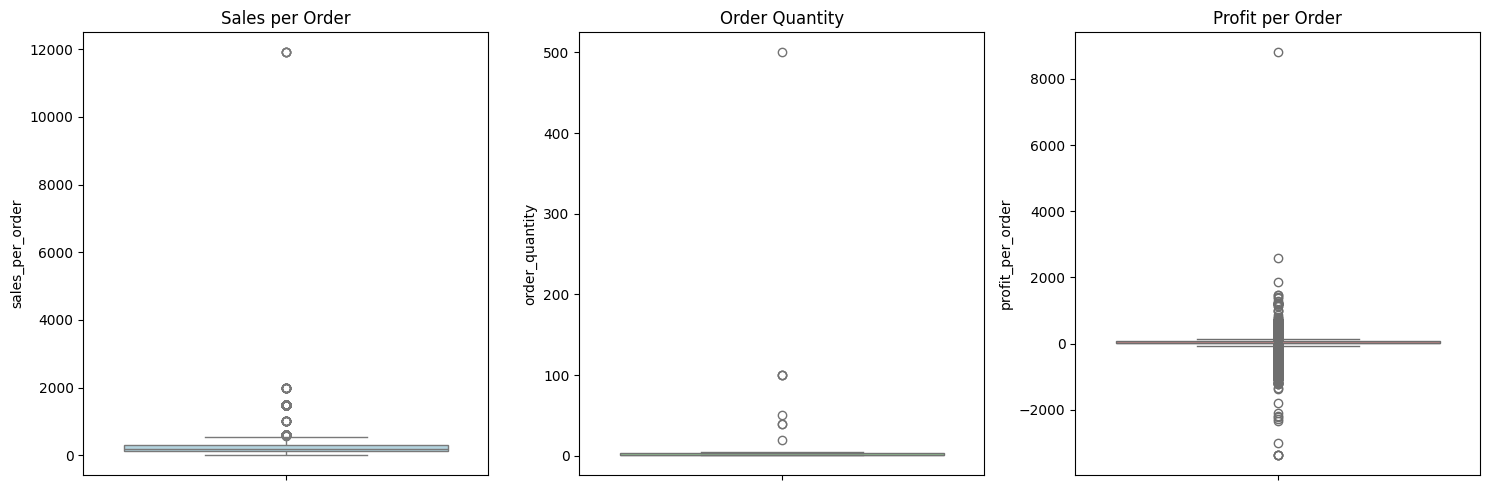

In [201]:
# Assuming `merged_df` is your DataFrame and outlier detection functions are already defined
outliers_sales = detect_outliers_iqr(merged_df, 'sales_per_order')
outliers_quantity = detect_outliers_iqr(merged_df, 'order_quantity')
outliers_profit = detect_outliers_iqr(merged_df, 'profit_per_order')

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Box plot for 'sales_per_order'
plt.subplot(1, 3, 1)
sns.boxplot(data=merged_df, y='sales_per_order', color='lightblue')
plt.title('Sales per Order')

# Box plot for 'order_quantity'
plt.subplot(1, 3, 2)
sns.boxplot(data=merged_df, y='order_quantity', color='lightgreen')
plt.title('Order Quantity')

# Box plot for 'profit_per_order'
plt.subplot(1, 3, 3)
sns.boxplot(data=merged_df, y='profit_per_order', color='lightcoral')
plt.title('Profit per Order')

# Adjust layout
plt.tight_layout()
plt.show()

In [173]:
# Function to identify outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

# Identify outliers
outliers_sales = detect_outliers_iqr(merged_df, 'sales_per_order')
outliers_quantity = detect_outliers_iqr(merged_df, 'order_quantity')
outliers_profit = detect_outliers_iqr(merged_df, 'profit_per_order')

# Create a copy of merged_df for updates
df = merged_df.copy()

# Replace outliers with median values
median_sales = df['sales_per_order'].median()
median_quantity = df['order_quantity'].median()
median_profit = df['profit_per_order'].median()

# Apply the replacement
df.loc[df['sales_per_order'].isin(outliers_sales['sales_per_order']), 'sales_per_order'] = median_sales
df.loc[df['order_quantity'].isin(outliers_quantity['order_quantity']), 'order_quantity'] = median_quantity
df.loc[df['profit_per_order'].isin(outliers_profit['profit_per_order']), 'profit_per_order'] = median_profit


In [174]:
df.head()

,customer_id,customer_first_name,customer_last_name,product_category,product_name,customer_segment,customer_city,order_date,order_id,ship_date,...,promised_days_for_shipment,order_item_discount,sales_per_order,order_quantity,profit_per_order,customer_state,state,latitude,longitude,customer_region
0,C_ID_45866,Mary,Fuller,Office Supplies,Xerox 1913,Corporate,New Rochelle,2022-05-11,O_ID_3001072,2022-05-12,...,2,35.0,500.0,5,32.029999,New York,NY,43.299428,-74.217933,East
1,C_ID_44932,Alan,Edelman,Office Supplies,#6 3/4 Gummed Flap White Envelopes,Corporate,Houston,2022-06-20,O_ID_3009170,2022-06-21,...,2,85.0,500.0,5,32.029999,Texas,TX,31.968599,-99.901813,Central
2,C_ID_70880,Mary,Gayman,Office Supplies,Belkin 8 Outlet Surge Protector,Consumer,Louisville,2022-06-25,O_ID_3047567,2022-06-30,...,4,75.0,44.0,5,32.029999,Kentucky,KY,37.839333,-84.270018,South
3,C_ID_70880,Mary,Gayman,Office Supplies,Belkin 8 Outlet Surge Protector,Consumer,Louisville,2022-06-25,O_ID_3047567,2022-06-30,...,4,75.0,44.0,5,32.029999,Colorado,CO,39.550051,-105.782067,West
4,C_ID_33157,Raymond,Eason,Office Supplies,GBC VeloBinder Manual Binding System,Corporate,Chicago,2022-06-10,O_ID_3060575,2022-06-12,...,2,60.0,254.0,1,32.029999,Illinois,IL,40.633125,-89.398528,Central


In [175]:
df.describe()

,order_date,ship_date,promised_days_for_shipment,order_item_discount,sales_per_order,order_quantity,profit_per_order,latitude,longitude
count,151467,151467,151467.000000,151467.000000,151467.000000,151467.000000,151467.000000,151467.000000,151467.000000
mean,2021-12-11 08:39:07.283566592,2021-12-14 16:35:24.248846592,2.927971,21.013482,198.304899,1.967419,38.163551,38.510703,-93.519119
min,2021-01-04 00:00:00,2021-01-04 00:00:00,0.000000,0.000000,9.990000,1.000000,-80.330002,27.664827,-120.740139
25%,2021-06-21 00:00:00,2021-06-25 00:00:00,2.000000,5.500000,119.980003,1.000000,13.930000,35.759573,-111.093731
50%,2021-12-06 00:00:00,2021-12-09 00:00:00,4.000000,14.400000,199.899994,1.000000,32.029999,38.802610,-86.580447
75%,2022-05-31 00:00:00,2022-06-03 00:00:00,4.000000,30.000000,293.040008,3.000000,60.450001,41.203322,-79.019300
max,2022-12-31 00:00:00,2023-01-06 00:00:00,4.000000,500.000000,532.580017,5.000000,153.119995,47.751074,-69.445469
std,NaN,NaN,1.379656,22.850404,113.134424,1.355246,41.045568,4.567185,16.962554


# *Exploratory Data Analysis and Visualisation:*

In [176]:
# Convert order_date and ship_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# Filter data for 2021 and 2022
df_2021 = df[df['order_date'].dt.year == 2021]
df_2022 = df[df['order_date'].dt.year == 2022]

**Total Sales Per Order Monthly Trend YoY**

<Figure size 1000x600 with 0 Axes>

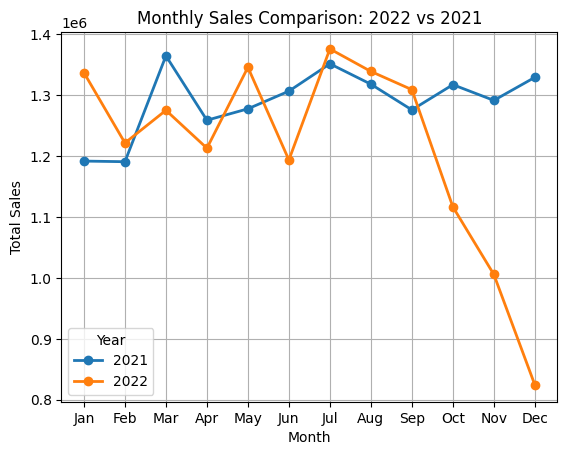

In [177]:
# Extract year and month from 'order_date'
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Filter data for the years 2021 and 2022
df_filtered = df[df['year'].isin([2021, 2022])]

# Group by year and month, summing up the 'sales_per_order'
sales_comparison = df_filtered.groupby(['year', 'month'])['sales_per_order'].sum().unstack(level=0)

# Line Chart for 2022 vs 2021 Sales Comparison
plt.figure(figsize=(10, 6))
sales_comparison.plot(kind='line', marker='o', linestyle='-', linewidth=2)

plt.title('Monthly Sales Comparison: 2022 vs 2021')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

The lines 2021 and 2022 are close together, it indicates that sales patterns were similar between the two years.

July 2022 indicates stronger sales performance during that month.

**Total Sales Distribution by Region YoY**

C:\Users\newhp\AppData\Local\Temp\ipykernel_9440\450383892.py:9: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x='customer_region', y='sales_per_order', hue='year', data=sales_region_yoy, palette=light_palette, edgecolor='black')


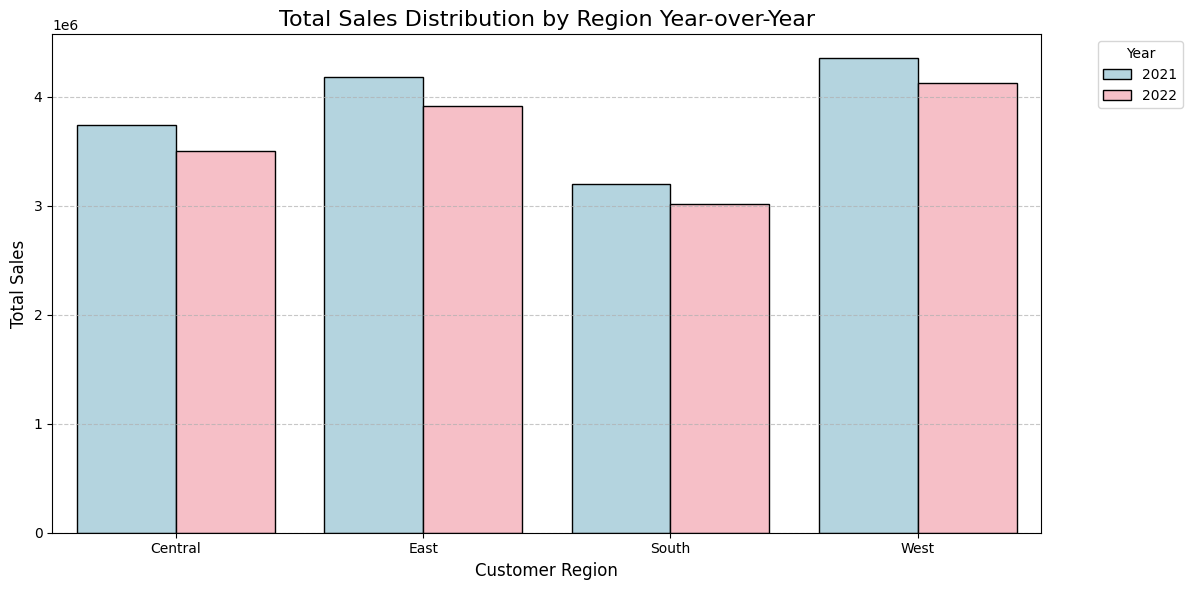

In [178]:
# Grouping data by 'customer_region' and 'year', and calculating total sales
sales_region_yoy = df.groupby(['customer_region', 'year'])['sales_per_order'].sum().reset_index()

# Setting the color palette to light, standard colors with edge colors
light_palette = sns.color_palette(["#add8e6", "#ffb6c1", "#98fb98", "#ffdab9"])  # Light blue, pink, green, and peach

# Creating the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_region', y='sales_per_order', hue='year', data=sales_region_yoy, palette=light_palette, edgecolor='black')

# Adding labels and title
plt.title('Total Sales Distribution by Region Year-over-Year', fontsize=16)
plt.xlabel('Customer Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Showing the legend with years
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding a grid for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot with better layout
plt.tight_layout()
plt.show()


The "west Region" indicates it is the top performer in each year in terms of sales.

However, there are potential issues or changes in the market conditions comparitively.

**Top 5 selling products YoY**

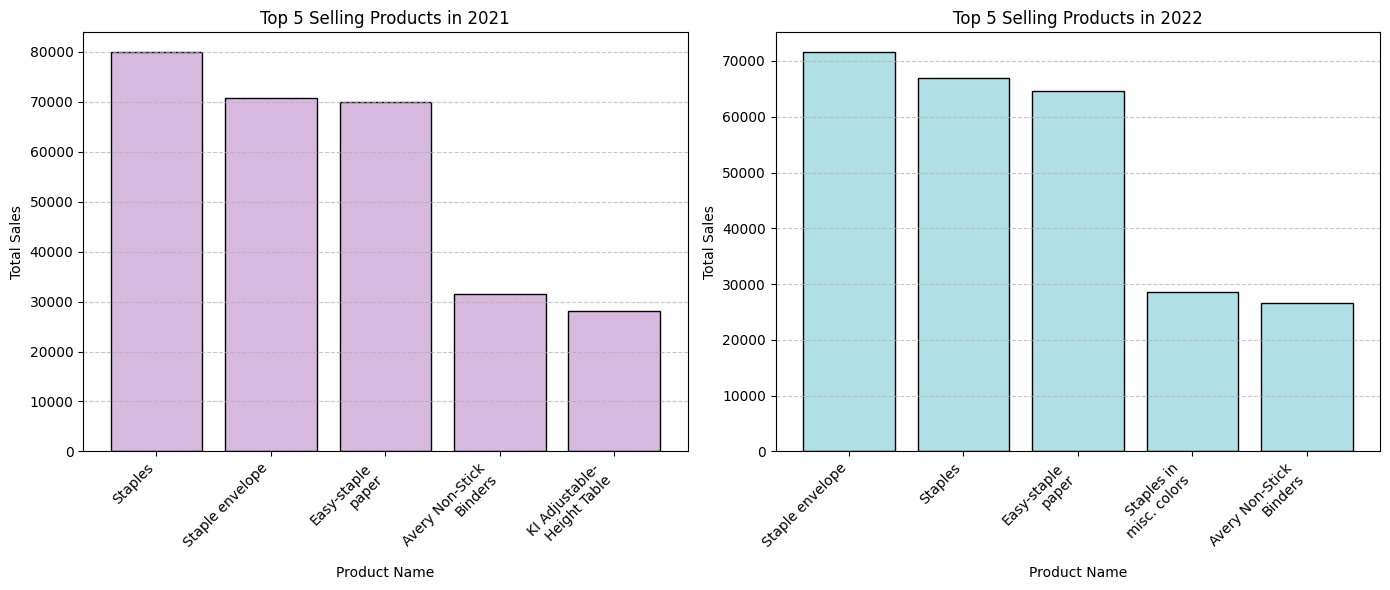

In [179]:
import textwrap
def plot_top_selling_products(df, year, color, ax):
    # Group by product_name, sum the sales, and get the top 5
    top_selling_products = df.groupby('product_name')['sales_per_order'].sum().sort_values(ascending=False).head(5)
    
    # Plot the bar chart
    bars = ax.bar(top_selling_products.index, top_selling_products.values, color=color, edgecolor='black')
    
    # Set title and labels
    ax.set_title(f'Top 5 Selling Products in {year}')
    ax.set_xlabel('Product Name')
    ax.set_ylabel('Total Sales')
    
    # Wrap long product names
    wrapped_labels = [textwrap.fill(label, 15) for label in top_selling_products.index]
    
    # Set x-ticks and x-tick labels
    ax.set_xticks(range(len(top_selling_products.index)))
    ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')
    
    # Add gridlines
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top 5 products for 2021 and 2022 with colors
plot_top_selling_products(df_2021, 2021, '#D7B9E0', axs[0])  # Pale Lavender
plot_top_selling_products(df_2022, 2022, '#B0E0E6', axs[1])  # Pale Blue

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

**2021:** Staples dominated the top-selling products list, followed by Staple Envelopes and Easy-Staple Paper.

**2022:** There was a significant shift in product popularity. Staples maintained their top position, but Easy-Staple Paper and Avery Non-Stick Binders saw a decline in sales.

Each segment of the stacked bars represents a product’s contribution to the average discount for that year.

Taller segments indicate higher average discounts for that product.

**Average Profit Per Order Trends YoY**

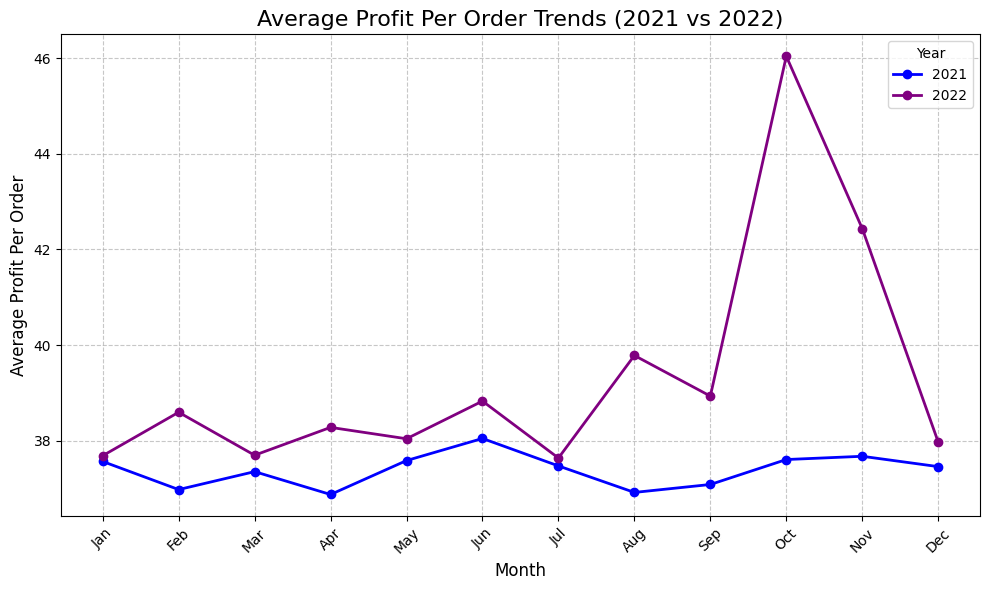

In [180]:
# Aggregate average profit per order by month for 2021 and 2022
monthly_summary_2021 = df_2021.groupby(df_2021['order_date'].dt.to_period('M'))['profit_per_order'].mean()
monthly_summary_2022 = df_2022.groupby(df_2022['order_date'].dt.to_period('M'))['profit_per_order'].mean()

# Convert period index to month names for x-axis labels
months_2021 = monthly_summary_2021.index.to_timestamp().strftime('%b')
months_2022 = monthly_summary_2022.index.to_timestamp().strftime('%b')

# Create the plot for profit per order trends YoY
plt.figure(figsize=(10, 6))

# Plot for 2021
plt.plot(months_2021, monthly_summary_2021, marker='o', label='2021', color='blue', linewidth=2)

# Plot for 2022
plt.plot(months_2022, monthly_summary_2022, marker='o', label='2022', color='purple', linewidth=2)

# Add chart title and axis labels
plt.title('Average Profit Per Order Trends (2021 vs 2022)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Profit Per Order', fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Add legend to differentiate years
plt.legend(title='Year', fontsize=10)

# Adjust layout to prevent label clipping
plt.tight_layout()

# Display the plot
plt.show()

The chart shows how the average profit per order varies each month for the years 2021 and 2022. The line plots indicate the profit trends throughout the year for both years.

By examining the monthly trends, we can identify any seasonal patterns or recurring trends in profit.

**Year-over-Year Analysis of Product Categories: Quantity Sold, Sales, and Profit Margin**

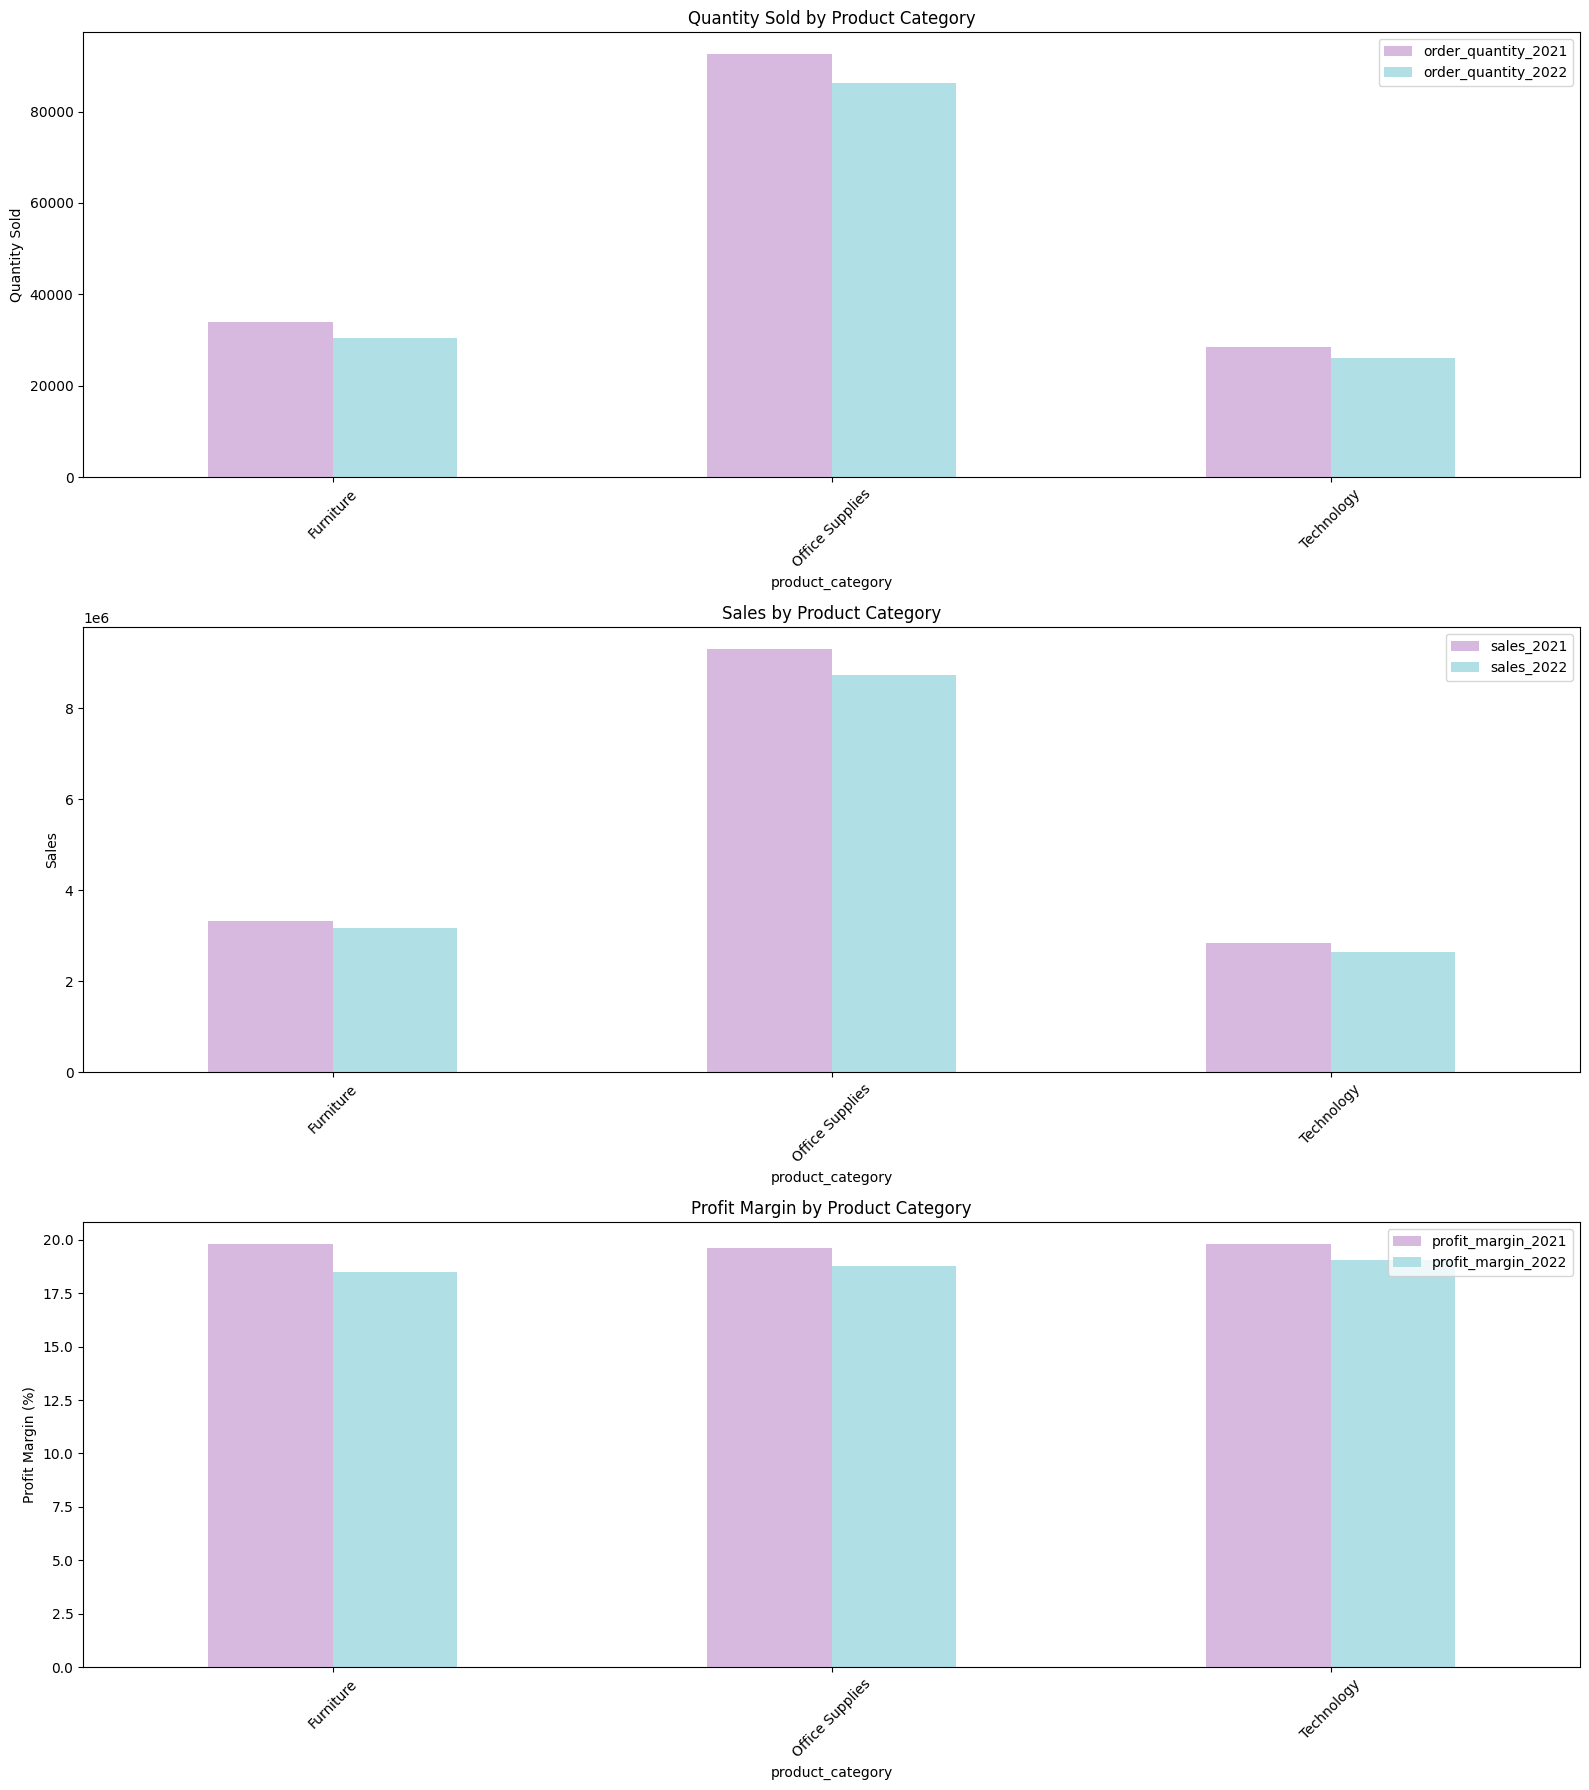

In [181]:
def calculate_performance(df):
    performance = df.groupby('product_category').agg({
        'order_quantity': 'sum',
        'sales_per_order': 'sum',
        'profit_per_order': 'sum'
    }).reset_index()
    performance['profit_margin'] = (performance['profit_per_order'] / performance['sales_per_order']) * 100
    return performance

# Calculate performance for both years
performance_2021 = calculate_performance(df_2021)
performance_2022 = calculate_performance(df_2022)

# Merge the data for comparison
comparison = performance_2021.rename(columns={
    'order_quantity': 'order_quantity_2021',
    'sales_per_order': 'sales_2021',
    'profit_per_order': 'profit_2021',
    'profit_margin': 'profit_margin_2021'
}).merge(
    performance_2022.rename(columns={
        'order_quantity': 'order_quantity_2022',
        'sales_per_order': 'sales_2022',
        'profit_per_order': 'profit_2022',
        'profit_margin': 'profit_margin_2022'
    }),
    on='product_category'
)

# Plot the comparison
fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Quantity Sold
comparison.plot(kind='bar', x='product_category', y=['order_quantity_2021', 'order_quantity_2022'], ax=axs[0], color=['#D7B9E0', '#B0E0E6'])
axs[0].set_title('Quantity Sold by Product Category')
axs[0].set_ylabel('Quantity Sold')
axs[0].set_xticklabels(comparison['product_category'], rotation=45)

# Sales
comparison.plot(kind='bar', x='product_category', y=['sales_2021', 'sales_2022'], ax=axs[1], color=['#D7B9E0', '#B0E0E6'])
axs[1].set_title('Sales by Product Category')
axs[1].set_ylabel('Sales')
axs[1].set_xticklabels(comparison['product_category'], rotation=45)

# Profit Margin
comparison.plot(kind='bar', x='product_category', y=['profit_margin_2021', 'profit_margin_2022'], ax=axs[2], color=['#D7B9E0', '#B0E0E6'])
axs[2].set_title('Profit Margin by Product Category')
axs[2].set_ylabel('Profit Margin (%)')
axs[2].set_xticklabels(comparison['product_category'], rotation=45)

plt.tight_layout()
plt.show()

*Quantity Sold by Product Category:* Shows the total quantity sold for each product category in 2021 and 2022.

*Sales by Product Category:* Highlights which categories had increased or decreased revenue across the two years.

*Profit Margin by Product Category:*  Reveals changes in profitability by category, showing where profit margins have improved or worsened.

**Late Delivery Region Wise YoY**

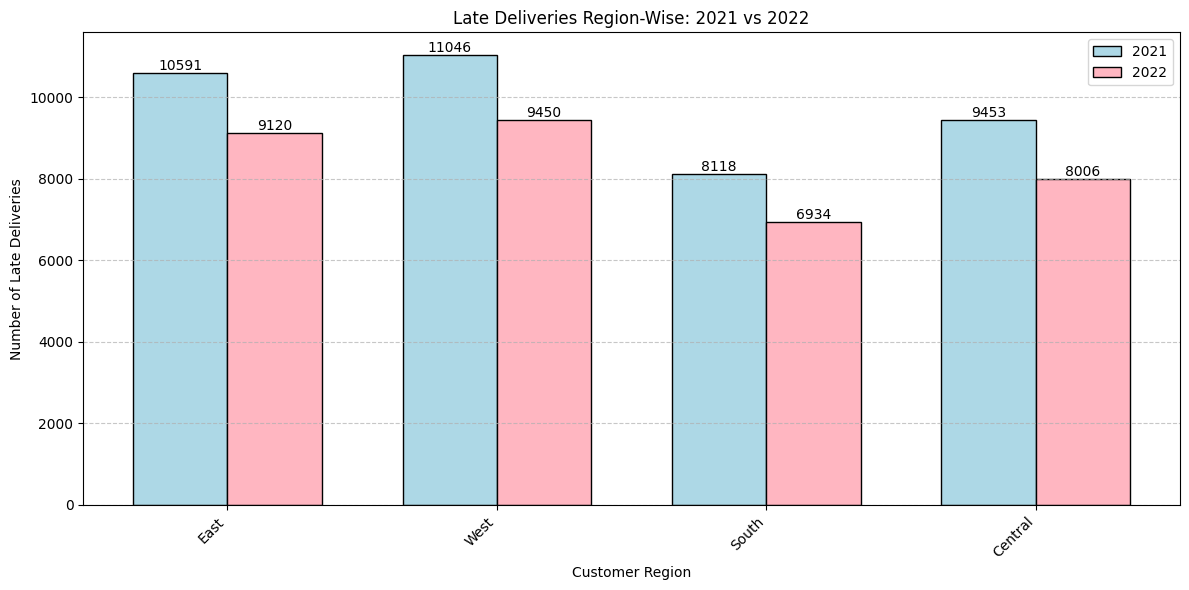

In [182]:
# Calculate late deliveries
for df in [df_2021, df_2022]:
    df['days_late'] = (df['ship_date'] - df['order_date']).dt.days - df['promised_days_for_shipment']
    df['late_delivery'] = df['days_late'] > 0

# Late deliveries region-wise
late_deliveries_region_2021 = df_2021[df_2021['late_delivery']].groupby('customer_region').size()
late_deliveries_region_2022 = df_2022[df_2022['late_delivery']].groupby('customer_region').size()

# Combine data for the bar chart
regions = list(set(late_deliveries_region_2021.index).union(set(late_deliveries_region_2022.index)))
late_deliveries_2021 = late_deliveries_region_2021.reindex(regions, fill_value=0)
late_deliveries_2022 = late_deliveries_region_2022.reindex(regions, fill_value=0)

# Plotting with lighter colors
x = np.arange(len(regions))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, late_deliveries_2021, width, label='2021', color='#add8e6', edgecolor='black')  # Light blue
bars2 = ax.bar(x + width/2, late_deliveries_2022, width, label='2022', color='#ffb6c1', edgecolor='black')  # Light pink

ax.set_xlabel('Customer Region')
ax.set_ylabel('Number of Late Deliveries')
ax.set_title('Late Deliveries Region-Wise: 2021 vs 2022')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Total Late Deliveries YoY**

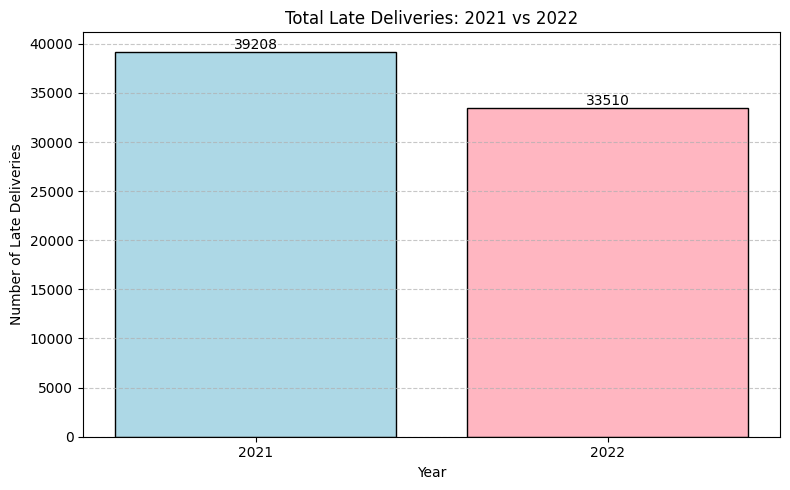

In [183]:
# Calculate late deliveries for each DataFrame
for df in [df_2021, df_2022]:
    df['days_late'] = (df['ship_date'] - df['order_date']).dt.days - df['promised_days_for_shipment']
    df['late_delivery'] = df['days_late'] > 0

# Calculate total late deliveries for each year
total_late_deliveries_2021 = df_2021['late_delivery'].sum()
total_late_deliveries_2022 = df_2022['late_delivery'].sum()

# Data for plotting
years = ['2021', '2022']
total_late_deliveries = [total_late_deliveries_2021, total_late_deliveries_2022]

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(years, total_late_deliveries, color=['#add8e6', '#ffb6c1'], edgecolor='black')  # Light blue and pink

ax.set_xlabel('Year')
ax.set_ylabel('Number of Late Deliveries')
ax.set_title('Total Late Deliveries: 2021 vs 2022')

# Add value labels
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Churned Customers in 2022 with and without Late Deliveries**

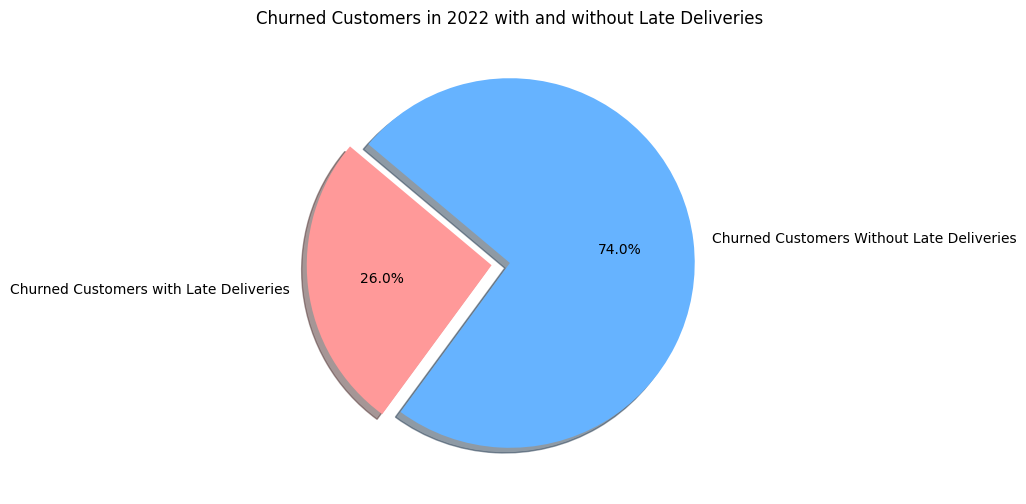

In [184]:
df_2021['late_delivery'] = df_2021['ship_date'] > df_2021['order_date'] + pd.Timedelta(days=5)
df_2022['late_delivery'] = df_2022['ship_date'] > df_2022['order_date'] + pd.Timedelta(days=5)
# Get unique customer IDs for 2021 and 2022
customers_2021 = set(df_2021['customer_id'].unique())
customers_2022 = set(df_2022['customer_id'].unique())

# Calculate churned customers (who bought in 2021 but not in 2022)
churned_customers = customers_2021 - customers_2022

# Identify churned customers who had late deliveries in 2021
churned_customers_with_late_deliveries = set(
    df_2021[df_2021['customer_id'].isin(churned_customers) & df_2021['late_delivery']]['customer_id'].unique()
)

# Calculate the number of churned customers and those with late deliveries
num_churned_customers = len(churned_customers)
num_churned_customers_with_late_deliveries = len(churned_customers_with_late_deliveries)

# Data for the pie chart
labels = ['Churned Customers with Late Deliveries', 'Churned Customers Without Late Deliveries']
sizes = [num_churned_customers_with_late_deliveries, num_churned_customers - num_churned_customers_with_late_deliveries]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_title('Churned Customers in 2022 with and without Late Deliveries')

plt.show()


**Customer Retention rate for 2022**

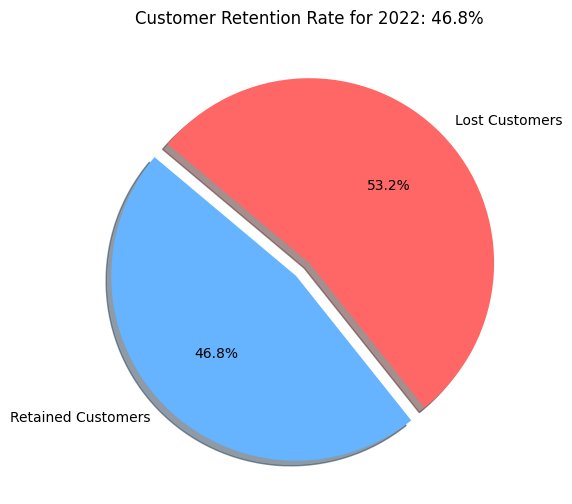

In [185]:
# Get unique customer IDs for 2021 and 2022
customers_2021 = set(df_2021['customer_id'].unique())
customers_2022 = set(df_2022['customer_id'].unique())

# Calculate retained customers and retention rate
retained_customers = customers_2021.intersection(customers_2022)
retention_rate = (len(retained_customers) / len(customers_2021)) * 100 if customers_2021 else 0

# Data for the pie chart
labels = ['Retained Customers', 'Lost Customers']
sizes = [len(retained_customers), len(customers_2021) - len(retained_customers)]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)  # explode the first slice

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_title(f'Customer Retention Rate for 2022: {retention_rate:.1f}%')

plt.show()

**Discount vs Sales Performance**

Correlation between discount and sales: 0.4390729667612978


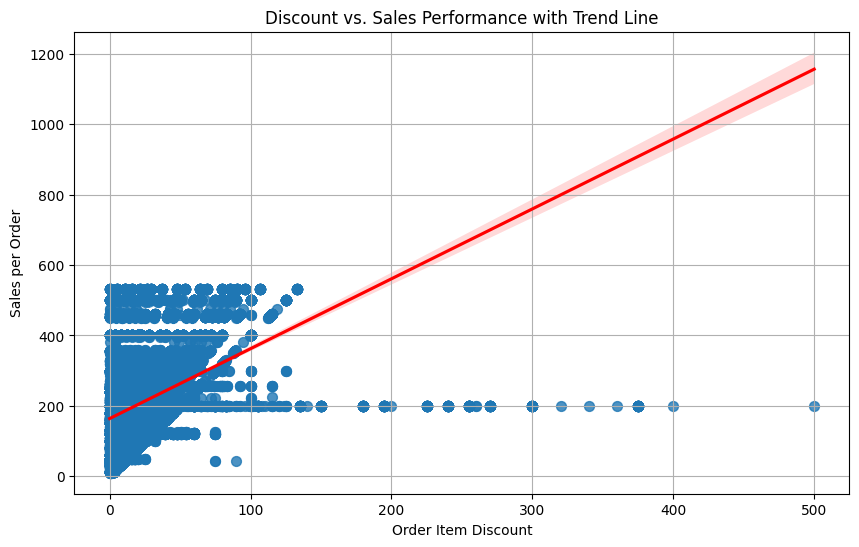

In [186]:
correlation = df['order_item_discount'].corr(df['sales_per_order'])
print(f'Correlation between discount and sales: {correlation}')

# Plot the relationship with scatter plot and regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='order_item_discount', y='sales_per_order', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Discount vs. Sales Performance with Trend Line')
plt.xlabel('Order Item Discount')
plt.ylabel('Sales per Order')
plt.grid(True)
plt.show()

**Customer Segment by Product Category Purchase for 2021 & 2022**

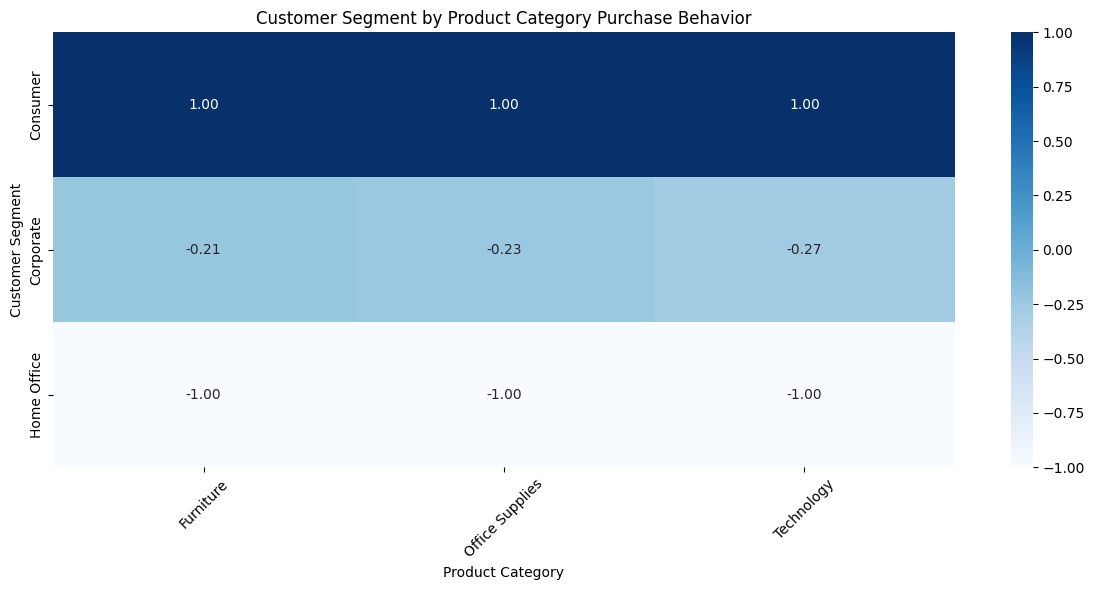

In [187]:
from sklearn.preprocessing import MinMaxScaler

# Example DataFrame df with 'customer_segment', 'product_category', and 'order_quantity' columns
# Aggregate total quantity by customer segment and product category
category_behavior = df.groupby(['customer_segment', 'product_category']).agg({'order_quantity': 'sum'}).unstack()
category_behavior.columns = category_behavior.columns.droplevel()  # Drop the extra level in columns

# Normalize the data to range -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_values = scaler.fit_transform(category_behavior.fillna(0))  # Fill NaN values with 0 for normalization
category_behavior_normalized = pd.DataFrame(normalized_values, index=category_behavior.index, columns=category_behavior.columns)

# Plot the results
plt.figure(figsize=(12, 6))
sns.heatmap(category_behavior_normalized, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1)
plt.title('Customer Segment by Product Category Purchase Behavior')
plt.xlabel('Product Category')
plt.ylabel('Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Normalized Purchase Behavior: The heatmap visualizes customer segment purchase behavior by product category, with values normalized to a range from -1 to 1.

Customer Segment Insights: Different shades of blue highlight how each customer segment’s purchase behavior varies across product categories.

All regions show a decrease in late deliveries from 2021 to 2022. This indicates an improvement in delivery performance across the board.

**Calcualting Total Sales,Sales Quantity and Average Sales Per Order**

2021 - Total Sales: $15,477,074.51, Avg Sales per Order: $189.83, Total Quantity Sold: 155,131
2022 - Total Sales: $14,559,573.61, Avg Sales per Order: $208.18, Total Quantity Sold: 142,868


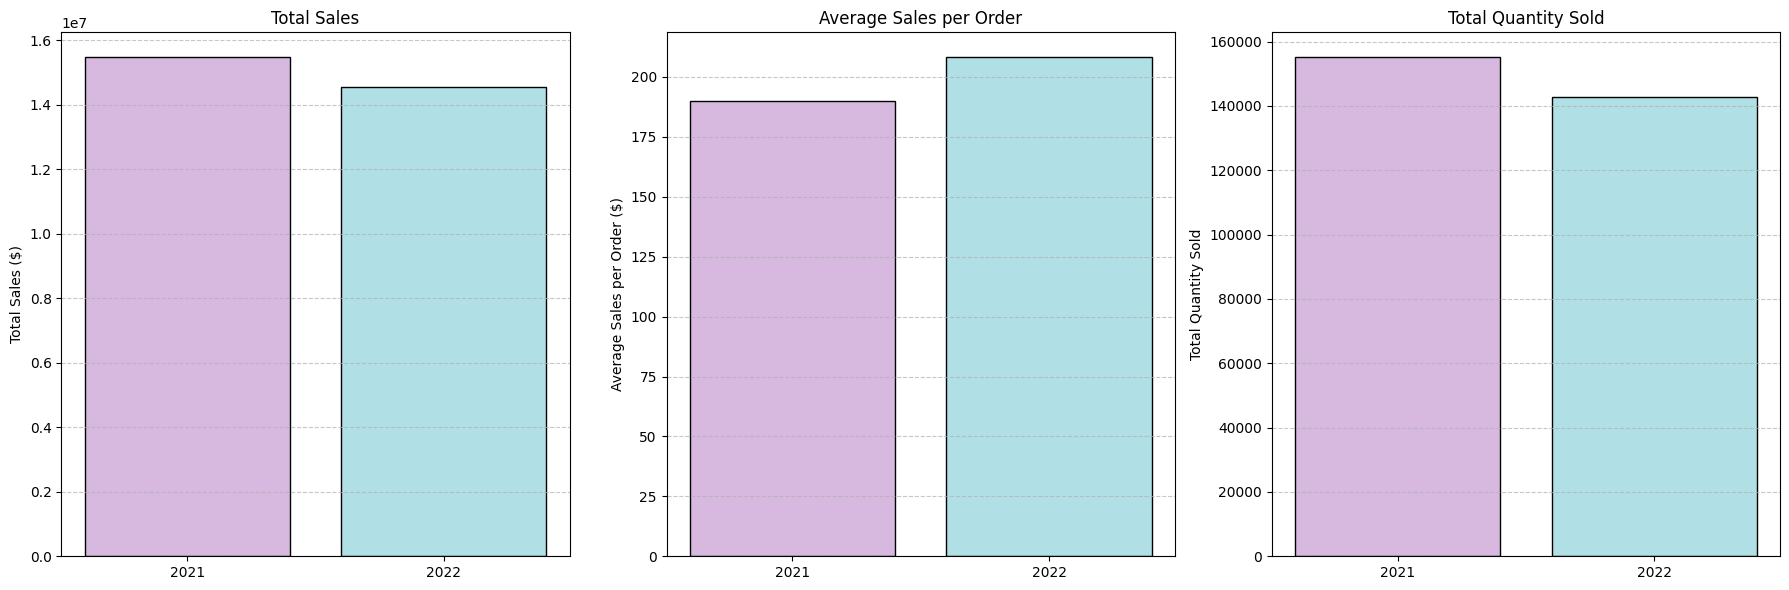

In [188]:
# Convert columns to numeric
def preprocess_data(df):
    df['sales_per_order'] = pd.to_numeric(df['sales_per_order'], errors='coerce')
    df['order_quantity'] = pd.to_numeric(df['order_quantity'], errors='coerce')
    return df

df_2021 = preprocess_data(df_2021)
df_2022 = preprocess_data(df_2022)

# Calculate total sales, average sales per order, and total quantity sold
def calculate_summary(df):
    total_sales = df['sales_per_order'].sum()
    avg_sales_per_order = df['sales_per_order'].mean()
    total_quantity_sold = df['order_quantity'].sum()
    return total_sales, avg_sales_per_order, total_quantity_sold

summary_2021 = calculate_summary(df_2021)
summary_2022 = calculate_summary(df_2022)

# Print results
print(f"2021 - Total Sales: ${summary_2021[0]:,.2f}, Avg Sales per Order: ${summary_2021[1]:,.2f}, Total Quantity Sold: {summary_2021[2]:,.0f}")
print(f"2022 - Total Sales: ${summary_2022[0]:,.2f}, Avg Sales per Order: ${summary_2022[1]:,.2f}, Total Quantity Sold: {summary_2022[2]:,.0f}")

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Total Sales
axs[0].bar(['2021', '2022'], [summary_2021[0], summary_2022[0]], color=['#D7B9E0', '#B0E0E6'], edgecolor='black')
axs[0].set_title('Total Sales')
axs[0].set_ylabel('Total Sales ($)')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Average Sales per Order
axs[1].bar(['2021', '2022'], [summary_2021[1], summary_2022[1]], color=['#D7B9E0', '#B0E0E6'], edgecolor='black')
axs[1].set_title('Average Sales per Order')
axs[1].set_ylabel('Average Sales per Order ($)')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Total Quantity Sold
axs[2].bar(['2021', '2022'], [summary_2021[2], summary_2022[2]], color=['#D7B9E0', '#B0E0E6'], edgecolor='black')
axs[2].set_title('Total Quantity Sold')
axs[2].set_ylabel('Total Quantity Sold')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Calculating the number of late deliveries in 2021 and 2022 Region Wise.**

C:\Users\newhp\AppData\Local\Temp\ipykernel_9440\4203060207.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=late_deliveries_region.index, y=late_deliveries_region.values, palette='pastel')


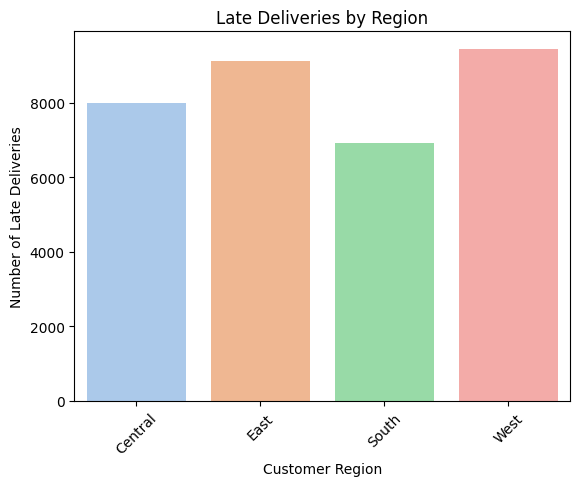

In [189]:
df['shipment_delay'] = (df['ship_date'] - df['order_date']).dt.days - df['promised_days_for_shipment']
# Analyze late deliveries by region
late_deliveries_region = df[df['shipment_delay'] > 0].groupby('customer_region').size()

# Check if there are late deliveries to plot
if late_deliveries_region.empty:
    print("No late deliveries found.")
else:
    # Plot results
    sns.barplot(x=late_deliveries_region.index, y=late_deliveries_region.values, palette='pastel')
    plt.title('Late Deliveries by Region')
    plt.xlabel('Customer Region')
    plt.ylabel('Number of Late Deliveries')
    plt.xticks(rotation=45)
    plt.show()



**Late vs on-time vs advanced shipment over time (month wise – 2021 vs 2022)**

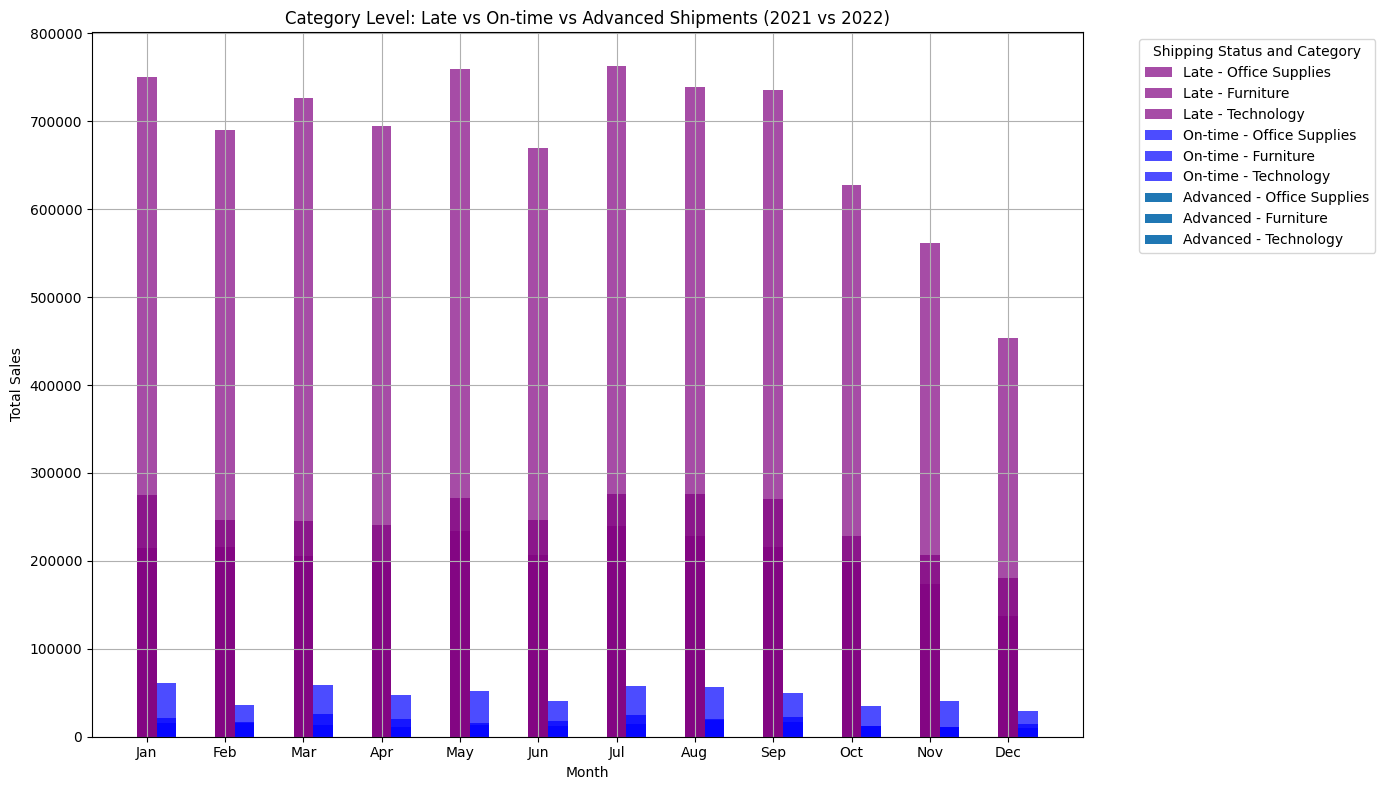

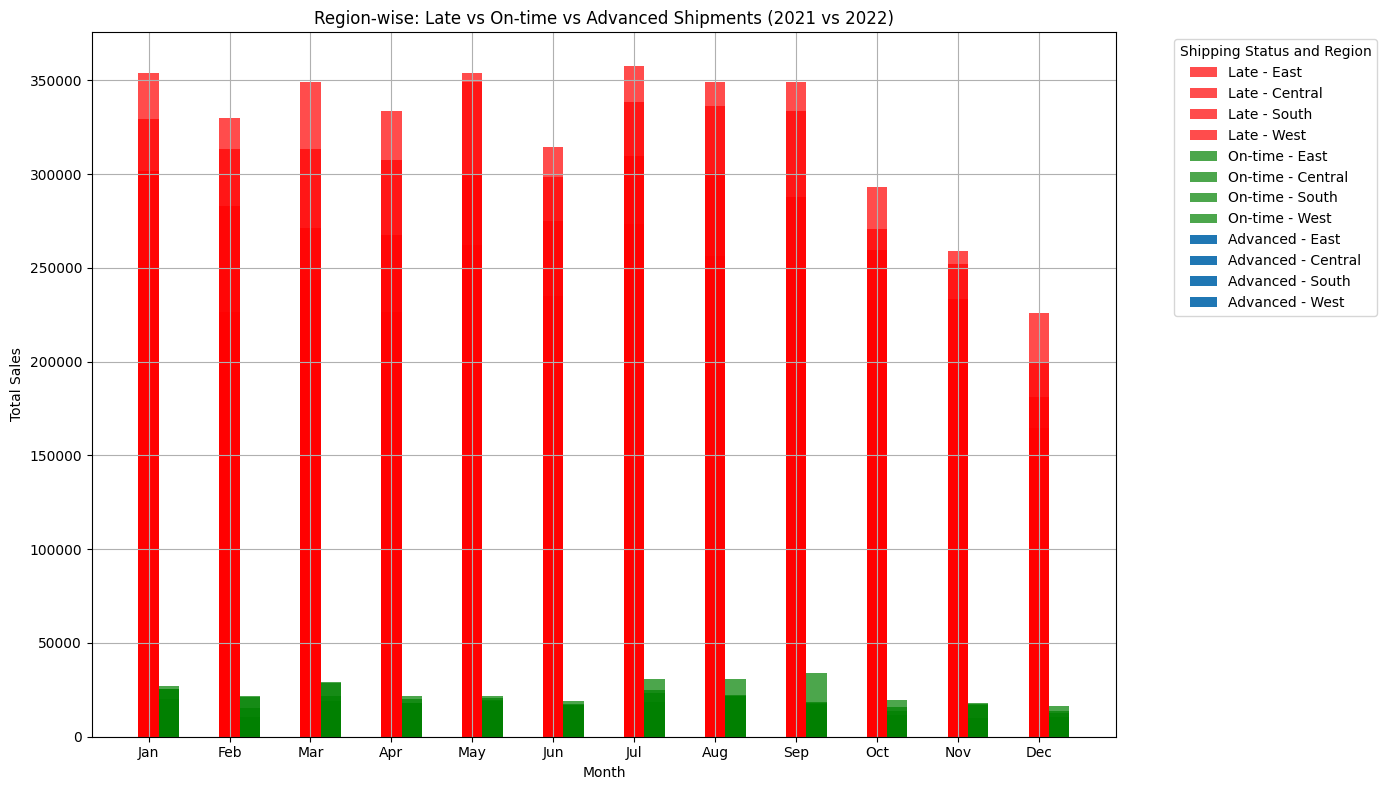

In [190]:
# Ensure 'order_date' and 'ship_date' are in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Extract year and month from 'order_date'
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Calculate shipping status
df['shipping_status'] = np.where(df['ship_date'] > df['order_date'], 'Late',
                                np.where(df['ship_date'] < df['order_date'], 'Advanced', 'On-time'))

# Filter data for the years 2021 and 2022
df_filtered = df[df['year'].isin([2021, 2022])]

# 1. Category Level: Combined Histogram for Late vs On-time vs Advanced Shipments
categories = df_filtered['product_category'].unique()

plt.figure(figsize=(14, 8))
bar_width = 0.25  # Width of the bars
for i, status in enumerate(['Late', 'On-time', 'Advanced']):
    offset = i * bar_width  # Offset for each status
    for category in categories:
        category_data = df_filtered[(df_filtered['product_category'] == category) &
                                    (df_filtered['shipping_status'] == status)]
        sales_by_month = category_data.groupby('month')['sales_per_order'].sum()
        plt.bar(sales_by_month.index + offset, sales_by_month.values,
                width=bar_width, color=['purple', 'blue', 'green'][i],
                alpha=0.7, label=f'{status} - {category}')

plt.title('Category Level: Late vs On-time vs Advanced Shipments (2021 vs 2022)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Shipping Status and Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Region-wise: Combined Histogram for Late vs On-time vs Advanced Shipments
if 'customer_region' in df_filtered.columns:
    regions = df_filtered['customer_region'].unique()

    plt.figure(figsize=(14, 8))
    for i, status in enumerate(['Late', 'On-time', 'Advanced']):
        offset = i * bar_width  # Offset for each status
        for region in regions:
            region_data = df_filtered[(df_filtered['customer_region'] == region) &
                                      (df_filtered['shipping_status'] == status)]
            sales_by_month = region_data.groupby('month')['sales_per_order'].sum()
            plt.bar(sales_by_month.index + offset, sales_by_month.values,
                    width=bar_width, color=['red', 'green', 'blue'][i],
                    alpha=0.7, label=f'{status} - {region}')

    plt.title('Region-wise: Late vs On-time vs Advanced Shipments (2021 vs 2022)')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Shipping Status and Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'customer_region' does not exist in the DataFrame.")


**Year Over Year Total Sales and Growth**

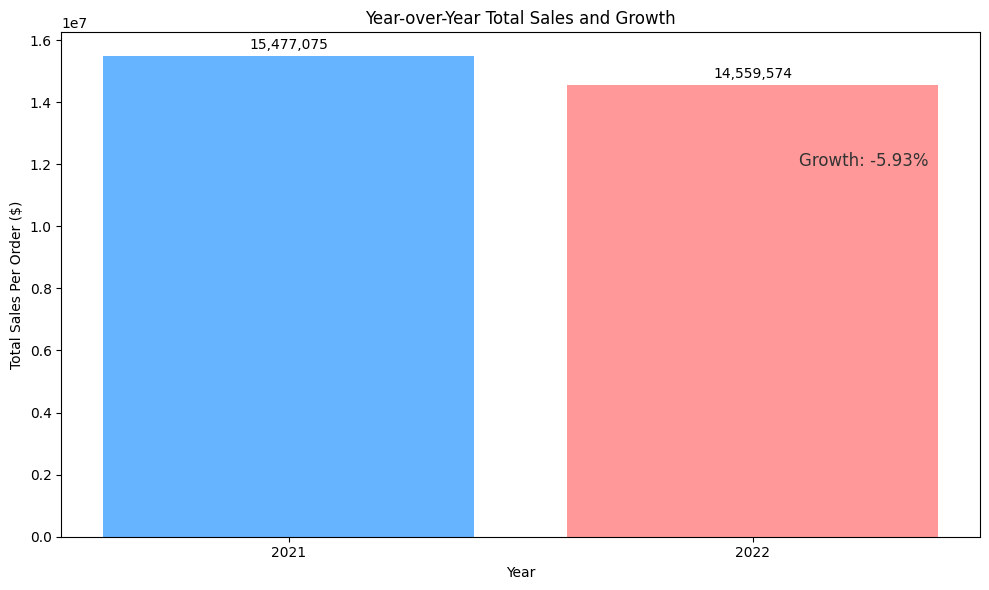

In [191]:
#Total sales over time for 2022 vs 2021.
# Aggregate total sales per order for each year
total_sales_per_order_2021 = df_2021['sales_per_order'].sum()
total_sales_per_order_2022 = df_2022['sales_per_order'].sum()

# Calculate year-over-year growth
growth = ((total_sales_per_order_2022 - total_sales_per_order_2021) / total_sales_per_order_2021) * 100

# Data for the plot
years = ['2021', '2022']
sales = [total_sales_per_order_2021, total_sales_per_order_2022]
growth_label = f'Growth: {growth:.2f}%'

# Plotting the total sales per order
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(years, sales, color=['#66b3ff', '#ff9999'])

# Adding growth annotation
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adding title and labels
ax.set_title(f'Year-over-Year Total Sales and Growth')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales Per Order ($)')
ax.text(1.1, max(sales) * 0.8, growth_label, fontsize=12, color='#333333', verticalalignment='top')

plt.tight_layout()
plt.show()


**Late Deliveries YoY for the Month of Sep-Dec**

C:\Users\newhp\AppData\Local\Temp\ipykernel_9440\2519148107.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_filtered['days_late'] = (df_2021_filtered['ship_date'] - df_2021_filtered['order_date']).dt.days - df_2021_filtered['promised_days_for_shipment']
C:\Users\newhp\AppData\Local\Temp\ipykernel_9440\2519148107.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_filtered['late_delivery'] = df_2021_filtered['days_late'] > 0
C:\Users\newhp\AppData\Local\Temp\ipykernel_9440\2519148107.py:

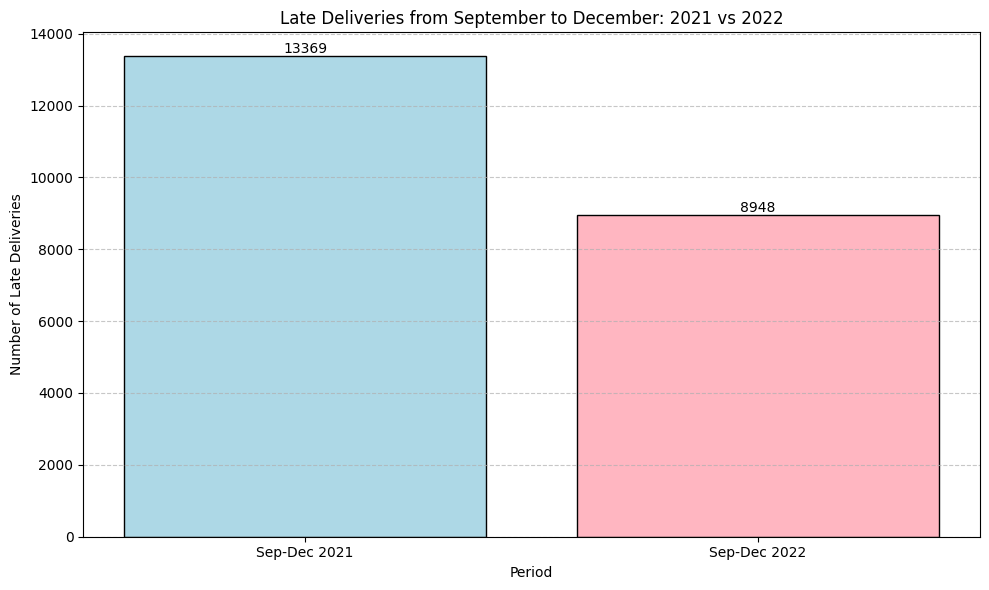

In [192]:
# Define the months of interest
months_of_interest = [9, 10, 11, 12]  # September to December

# Filter data for September to December
df_2021_filtered = df_2021[df_2021['order_date'].dt.month.isin(months_of_interest)]
df_2022_filtered = df_2022[df_2022['order_date'].dt.month.isin(months_of_interest)]

# Calculate late deliveries for the filtered data
df_2021_filtered['days_late'] = (df_2021_filtered['ship_date'] - df_2021_filtered['order_date']).dt.days - df_2021_filtered['promised_days_for_shipment']
df_2021_filtered['late_delivery'] = df_2021_filtered['days_late'] > 0

df_2022_filtered['days_late'] = (df_2022_filtered['ship_date'] - df_2022_filtered['order_date']).dt.days - df_2022_filtered['promised_days_for_shipment']
df_2022_filtered['late_delivery'] = df_2022_filtered['days_late'] > 0

# Calculate total late deliveries for September to December
total_late_deliveries_2021 = df_2021_filtered['late_delivery'].sum()
total_late_deliveries_2022 = df_2022_filtered['late_delivery'].sum()

# Data for plotting
periods = ['Sep-Dec 2021', 'Sep-Dec 2022']
total_late_deliveries = [total_late_deliveries_2021, total_late_deliveries_2022]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(periods, total_late_deliveries, color=['#add8e6', '#ffb6c1'], edgecolor='black')  # Light blue and pink

ax.set_xlabel('Period')
ax.set_ylabel('Number of Late Deliveries')
ax.set_title('Late Deliveries from September to December: 2021 vs 2022')

# Add value labels
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\newhp\AppData\Local\Temp\ipykernel_9440\1821478445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_filtered['days_late'] = (df_2021_filtered['ship_date'] - df_2021_filtered['order_date']).dt.days - df_2021_filtered['promised_days_for_shipment']
C:\Users\newhp\AppData\Local\Temp\ipykernel_9440\1821478445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_filtered['late_delivery'] = df_2021_filtered['days_late'] > 0
C:\Users\newhp\AppData\Local\Temp\ipykernel_9440\1821478445.py:5

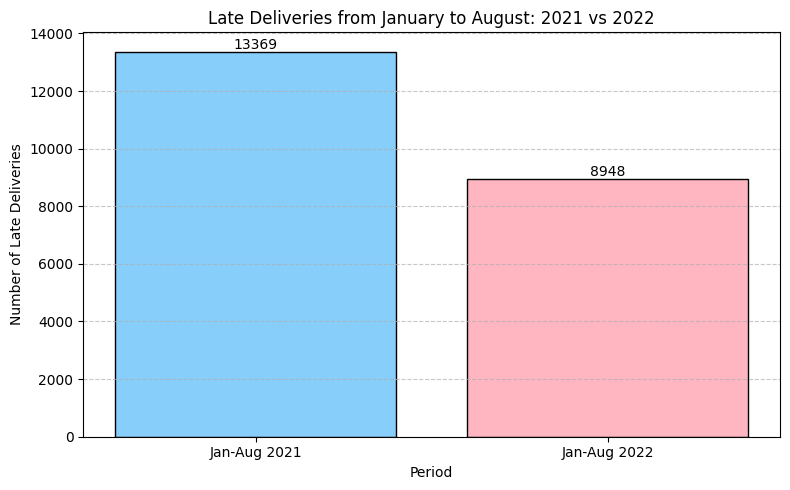

In [193]:
# Calculate late deliveries for the filtered data
df_2021_filtered['days_late'] = (df_2021_filtered['ship_date'] - df_2021_filtered['order_date']).dt.days - df_2021_filtered['promised_days_for_shipment']
df_2021_filtered['late_delivery'] = df_2021_filtered['days_late'] > 0

df_2022_filtered['days_late'] = (df_2022_filtered['ship_date'] - df_2022_filtered['order_date']).dt.days - df_2022_filtered['promised_days_for_shipment']
df_2022_filtered['late_delivery'] = df_2022_filtered['days_late'] > 0

# Calculate total late deliveries for January to August
total_late_deliveries_2021 = df_2021_filtered['late_delivery'].sum()
total_late_deliveries_2022 = df_2022_filtered['late_delivery'].sum()

# Data for plotting
periods = ['Jan-Aug 2021', 'Jan-Aug 2022']
total_late_deliveries = [total_late_deliveries_2021, total_late_deliveries_2022]

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(periods, total_late_deliveries, color=['#87cefa', '#ffb6c1'], edgecolor='black')  # Light sky blue and light pink

ax.set_xlabel('Period')
ax.set_ylabel('Number of Late Deliveries')
ax.set_title('Late Deliveries from January to August: 2021 vs 2022')

# Add value labels
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# *SQL Queries:*

In [194]:
df.to_csv('df.csv', index=False) #saving the data

In [195]:
import sqlite3
import pandas as pd

In [196]:
#Create an In-Memory SQLite Database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Load the DataFrame into the database
df.to_sql('df', conn, index=False, if_exists='replace')

69937

Total Sales per Product Category:

In [197]:
query = '''
    SELECT product_category, SUM(sales_per_order) AS total_sales
    FROM df
    GROUP BY product_category;
'''
result = pd.read_sql_query(query, conn)
print(result)

  product_category   total_sales
0        Furniture  3.179358e+06
1  Office Supplies  8.734388e+06
2       Technology  2.645828e+06


Monthly Sales Trend

In [198]:
query = '''
    SELECT 
    strftime('%Y', order_date) AS order_year,
    strftime('%m', order_date) AS order_month,
    SUM(sales_per_order) AS monthly_sales
FROM df
GROUP BY order_year, order_month
ORDER BY order_year, order_month;
'''
monthly_sales = pd.read_sql_query(query, conn)
print(monthly_sales)

   order_year order_month  monthly_sales
0        2022          01   1.337201e+06
1        2022          02   1.221853e+06
2        2022          03   1.275471e+06
3        2022          04   1.213210e+06
4        2022          05   1.346067e+06
5        2022          06   1.193871e+06
6        2022          07   1.376267e+06
7        2022          08   1.339294e+06
8        2022          09   1.309355e+06
9        2022          10   1.116841e+06
10       2022          11   1.005758e+06
11       2022          12   8.243863e+05


Top 10 Selling Products State-Wise:

In [199]:
query = '''
    WITH RankedProducts AS (
        SELECT 
            state,
            product_name,
            SUM(sales_per_order) AS total_sales,
            ROW_NUMBER() OVER (PARTITION BY state ORDER BY SUM(sales_per_order) DESC) AS rank
        FROM df
        GROUP BY state, product_name
    )
    SELECT 
        state,
        product_name,
        total_sales
    FROM RankedProducts
    WHERE rank <= 10
    ORDER BY state, rank;
'''

# Execute the query and load the data into a DataFrame
top_products_statewise = pd.read_sql_query(query, conn)

# Print the DataFrame
print(top_products_statewise)

    state                                       product_name  total_sales
0      AL        Dixon Ticonderoga Core-Lock Colored Pencils  1204.500030
1      AL      Space Solutions HD Industrial Steel Shelving.  1149.830017
2      AL  Sanford Colorific Eraseable Coloring Pencils, ...  1149.830017
3      AL              Premier Elliptical Ring Binder, Black  1052.010025
4      AL                                  Easy-staple paper   992.540028
..    ...                                                ...          ...
482    WY            Hon 2111 Invitation Series Corner Table   239.960007
483    WY                                          Avery 499   199.990005
484    WY               Eureka Sanitaire  Commercial Upright   199.949997
485    WY                     Hon Non-Folding Utility Tables   129.990005
486    WY         Eldon 200 Class Desk Accessories, Burgundy    39.750000

[487 rows x 3 columns]


Customer Segmentation Based on Purchase Frequency:

In [200]:
query = '''
    WITH CustomerFrequency AS (
        SELECT 
            customer_id,
            COUNT(order_id) AS purchase_frequency
        FROM df
        GROUP BY customer_id
    )
    SELECT 
        customer_id,
        purchase_frequency,
        CASE
            WHEN purchase_frequency >= 20 THEN 'High Frequency'
            WHEN purchase_frequency BETWEEN 10 AND 19 THEN 'Medium Frequency'
            ELSE 'Low Frequency'
        END AS frequency_segment
    FROM CustomerFrequency;
'''

# Execute the query and load the data into a DataFrame
customer_segmentation = pd.read_sql_query(query, conn)

# Print the DataFrame
print(customer_segmentation)


      customer_id  purchase_frequency frequency_segment
0      C_ID_25005                   3     Low Frequency
1      C_ID_25007                   7     Low Frequency
2      C_ID_25008                   2     Low Frequency
3      C_ID_25009                   4     Low Frequency
4      C_ID_25010                   1     Low Frequency
...           ...                 ...               ...
26422  C_ID_75070                   1     Low Frequency
26423  C_ID_75071                   2     Low Frequency
26424  C_ID_75076                   2     Low Frequency
26425  C_ID_75079                   1     Low Frequency
26426  C_ID_75081                   1     Low Frequency

[26427 rows x 3 columns]
